<a href="https://colab.research.google.com/github/Alex868686/Empty-Repo/blob/main/Regression2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import plotly as px
import seaborn as sns


path="https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/datalr.csv"


In [100]:
points = np.genfromtxt(path, delimiter=',')

#Extract columns
x = np.array(points[:,0])
y = np.array(points[:,1])

In [101]:
# x = 10 * generate_random.rand(100)

# noise = np.random.normal(0,1,100)
# y = 3 * x + noise

In [102]:
X = x.reshape(-1, 1)

In [103]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X,y)
y_pred = model.predict(X)

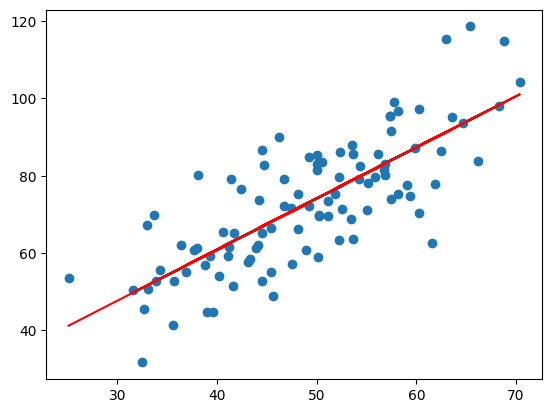

In [104]:
plt.plot(X,y,"o")
plt.plot(X, y_pred, "-r")

In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.1, 
                                                    random_state = 667)


In [128]:
model.fit(X_train, y_train)

LinearRegression()

In [129]:
y_pred = model.predict(X_test) #input che non ha mai visto

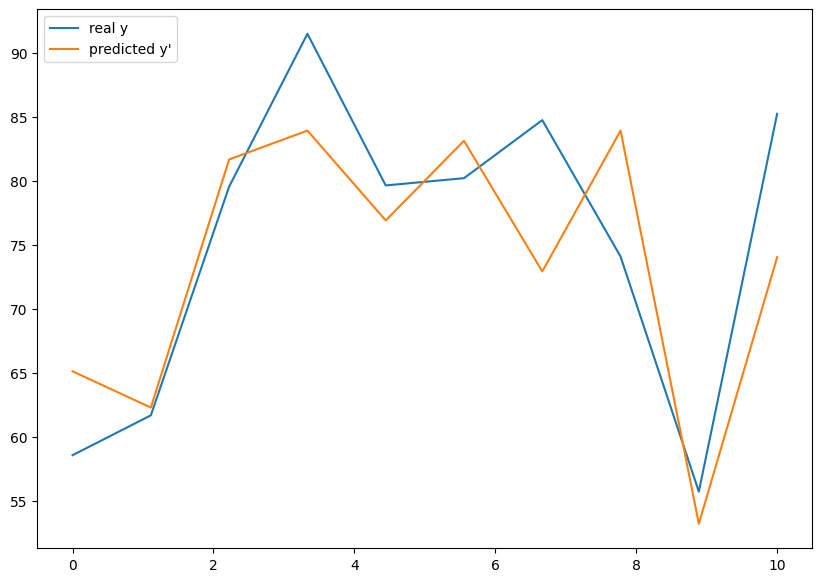

In [130]:
length = y_pred.shape[0] #  
x = np.linspace(0,length,length)

plt.figure(figsize=(10,7))
plt.plot(x, y_test, label='real y')
plt.plot(x, y_pred, label="predicted y'")
plt.legend(loc=2);

In [131]:
res_df = pd.DataFrame(data=list(zip(y_pred, y_test)),columns=['predicted y', 'real y'])
res_df

,predicted y,real y
0,65.121573,58.569825
1,62.290071,61.684038
2,81.672990,79.550437
3,83.924654,91.486778
4,76.909428,79.641973
5,83.124989,80.207523
6,72.922613,84.742698
7,83.924541,74.084130
8,53.212249,55.723489
9,74.030271,85.232007


In [132]:
res_df['error'] = res_df['real y'] - res_df['predicted y']
res_df

,predicted y,real y,error
0,65.121573,58.569825,-6.551748
1,62.290071,61.684038,-0.606034
2,81.672990,79.550437,-2.122554
3,83.924654,91.486778,7.562124
4,76.909428,79.641973,2.732545
5,83.124989,80.207523,-2.917466
6,72.922613,84.742698,11.820085
7,83.924541,74.084130,-9.840411
8,53.212249,55.723489,2.511240
9,74.030271,85.232007,11.201736


In [133]:
res_df.mean().abs()

predicted y    73.713338
real y         75.092290
error           1.378952
dtype: float64